## Introduction

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities. It is a more unique, personalized way of experiencing the world and meeting with new people. Airbnb provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guests can search for lodging using filters such as lodging type, dates, location, and price. Hosts provide prices and other details for their rental or event listings, such as the allowed number of guests, home type, rules, and amenities.Pricing is determined by the host, with recommendations from Airbnb.Hosts and guests have the ability to leave reviews about the experience.

This dataset describes the listing activity and metrics in NYC, NY for 2019.
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

#### Inspiration
- Which factor (room types, neighbourhoods etc) contribute to the price most? <br/>
- Which type of post (key words) is correlate with high price?br/>
- What can we learn about different hosts and areas?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('AB_NYC_2019.csv')

### Popular words in post between different price groups
We segmented price into two groups by the median price and plot their most popular words respectively.

In [5]:
# segment price into two groups by median 
bin_edges = [0, 106, 10000]
bin_name = ['low', 'high']
df['price_bin'] = pd.cut(df['price'], bins=bin_edges, labels=bin_name)

In [6]:
# get the post content for each price group in a string 
low = ''
df_low = df[df['price_bin'] == 'low']['name'].astype(str)
for i in range(len(df_low)):
    words = df_low.iloc[i].split(' ')
    for word in words:
        low += word+' '
        
high = ''
df_high = df[df['price_bin'] == 'high']['name'].astype(str)
for i in range(len(df_high)):
    words = df_high.iloc[i].split(' ')
    for word in words:
        high += word+' '

In [7]:
# Get the most popular 5 words for each price group and convert to dataframe
from collections import Counter
low_Counter = Counter(low.lower().split(' '))
low_occur = low_Counter.most_common(5)

high_Counter = Counter(high.lower().split(' '))
high_occur = high_Counter.most_common(5)

low_df = pd.DataFrame(low_occur, columns=['word', 'count'])
low_df = low_df.iloc[1:,:]

high_df = pd.DataFrame(high_occur, columns=['word', 'count'])
high_df = high_df.iloc[1:,:]

In [8]:
# Get the most popular 5 words for each price group and convert to dataframe
from collections import Counter
low_Counter = Counter(low.lower().split(' '))
low_occur = low_Counter.most_common(5)

high_Counter = Counter(high.lower().split(' '))
high_occur = high_Counter.most_common(5)

low_df = pd.DataFrame(low_occur, columns=['word', 'count'])
low_df = low_df.iloc[1:,:]

high_df = pd.DataFrame(high_occur, columns=['word', 'count'])
high_df = high_df.iloc[1:,:]

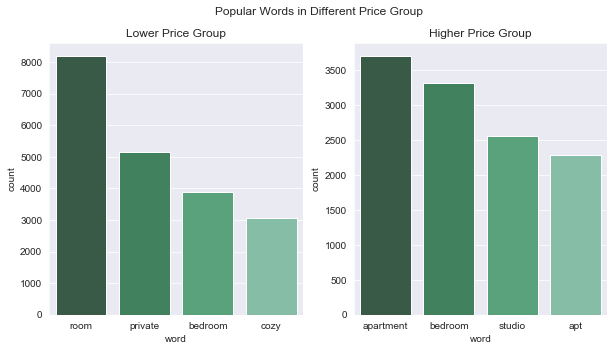

In [9]:
# create a bar plot for each price group, with most popular words
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=low_df, x='word', y='count', palette = "BuGn_d")
plt.title('Lower Price Group', fontsize=12);

plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=high_df, x='word', y='count', palette = "BuGn_d")
plt.title('Higher Price Group', fontsize=12)
plt.suptitle('Popular Words in Different Price Group');

Seems like the low price group prefer to use words like 'private' and 'cozy', while 'studio' and 'apartment' yield higher listed prices. 

### Price VS. Room Type VS. Neighbourhood
Character the price for different neighbourhood groups and room types. 

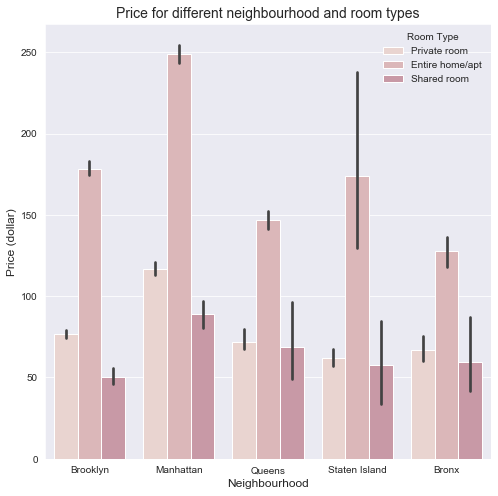

In [10]:
# plot price for different neighbourhood and room types
plt.figure(figsize=(8, 8))
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type', palette=sns.cubehelix_palette(8))
plt.xlabel('Neighbourhood', fontsize=12)
plt.ylabel('Price (dollar)', fontsize=12)
plt.title('Price for different neighbourhood and room types', fontsize=14)
plt.legend(loc=1, framealpha=0, title='Room Type');

From the data above, we found that in general entire home/apartment is more expensive than private room and shared room. In popular area like Mahattan and Brooklyn, private room is more expensive than shared room. However, in neighbourhoods like Queens, Staten Island and Bronx, there's no significant difference. Maybe choose a private room in these neighbourhood would be an economical choice!

### Price Distribution in Mapview
Next, we will map the price into a geographic map to see the distribution of listed price and its trend.

In [11]:
# remove outliers (> 1.5*IQR)
df2 = df[df['price'] <= 334]

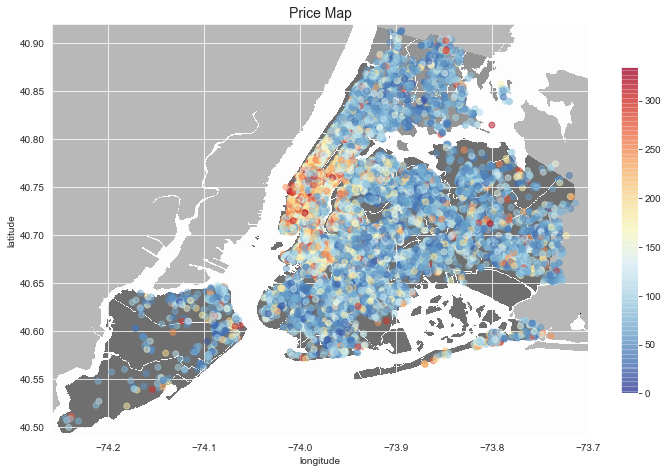

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

# Show Background image
img=plt.imread('New_York_City_.png', 0)
coordenates_to_extent = [-74.258, -73.7, 40.49, 40.92]
ax.imshow(img, zorder=0, extent=coordenates_to_extent)
cm = plt.cm.get_cmap('RdYlBu_r')

# Plotting
scatter_map = plt.scatter(data=df2, x='longitude', y='latitude', c='price', alpha=0.5, cmap=cm)
plt.colorbar(shrink = 0.5)
ax.grid(True)
plt.title('Price Map', fontsize=14)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

From the map we could see that there are a lot of lists in Manhattan, and expensive lists are clustered there too. The density of lists for other areas is lower. In general, the closer to Manhattan, the list gets more expensive. Interestingly, there are more lists located along the river, maybe due to easy transportation. 